In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ordersData = pd.read_csv(r"D:\Downloads\Data Source\Youtube\Data with Baraa\US_Superstore\Orders1.csv")
customersData = pd.read_csv(r"D:\Downloads\Data Source\Youtube\Data with Baraa\US_Superstore\Customers1.csv")
productsData = pd.read_csv(r"D:\Downloads\Data Source\Youtube\Data with Baraa\US_Superstore\Products1.csv")
locationData = pd.read_csv(r"D:\Downloads\Data Source\Youtube\Data with Baraa\US_Superstore\Location1.csv")

# Data Cleaning

In [ ]:
print(ordersData.duplicated().sum())
print(customersData.duplicated().sum())
print(locationData.duplicated().sum())
print(productsData.duplicated().sum())

In [ ]:
print(ordersData.isnull().sum())
print(customersData.isnull().sum())
print(locationData.isnull().sum())
print(productsData.isnull().sum())

In [2]:
df1 = pd.merge(ordersData, productsData)
df2 = pd.merge(df1, locationData)
df3 = pd.merge(df2, customersData)
df3.drop(columns=["Row ID", "Postal Code", "Country/Region"], inplace=True)

In [3]:
df3.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Product ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product Name,City,State,Region,Customer Name
0,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,Henderson,Kentucky,South,Claire Gute
1,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Henderson,Kentucky,South,Claire Gute
2,CA-2022-138688,12/06/2022,16/06/2022,Second Class,DV-13045,Corporate,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Los Angeles,California,West,Darrin Van Huff
3,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Fort Lauderdale,Florida,South,Sean O'Donnell
4,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Fort Lauderdale,Florida,South,Sean O'Donnell


In [234]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       10372 non-null  object 
 1   Order Date     10372 non-null  object 
 2   Ship Date      10372 non-null  object 
 3   Ship Mode      10372 non-null  object 
 4   Customer ID    10372 non-null  object 
 5   Segment        10372 non-null  object 
 6   Product ID     10372 non-null  object 
 7   Sales          10372 non-null  float64
 8   Quantity       10372 non-null  int64  
 9   Discount       10372 non-null  float64
 10  Profit         10372 non-null  float64
 11  Category       10372 non-null  object 
 12  Sub-Category   10372 non-null  object 
 13  Product Name   10372 non-null  object 
 14  City           10372 non-null  object 
 15  State          10372 non-null  object 
 16  Region         10372 non-null  object 
 17  Customer Name  10372 non-null  object 
dtypes: flo

In [3]:
df3["Order Date"] = pd.to_datetime(df3["Order Date"], dayfirst=True)
df3["Ship Date"] = pd.to_datetime(df3["Ship Date"], dayfirst=True)
df3["Month"] = df3["Order Date"].dt.month_name()
df3["Day"] = df3["Order Date"].dt.day_name()
df3["Year"] = df3["Order Date"].dt.year

df3["monthYear"] = df3["Order Date"].dt.to_period('M')

df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       10372 non-null  object        
 1   Order Date     10372 non-null  datetime64[ns]
 2   Ship Date      10372 non-null  datetime64[ns]
 3   Ship Mode      10372 non-null  object        
 4   Customer ID    10372 non-null  object        
 5   Segment        10372 non-null  object        
 6   Product ID     10372 non-null  object        
 7   Sales          10372 non-null  float64       
 8   Quantity       10372 non-null  int64         
 9   Discount       10372 non-null  float64       
 10  Profit         10372 non-null  float64       
 11  Category       10372 non-null  object        
 12  Sub-Category   10372 non-null  object        
 13  Product Name   10372 non-null  object        
 14  City           10372 non-null  object        
 15  State          1037

In [236]:
print(f"Unique order id: {df3['Order ID'].nunique()}")
print(f"Duplicate order id: {df3['Order ID'].duplicated().sum()}")

Unique order id: 5009
Duplicate order id: 5363


In [237]:
print(f"Regions: {df3['Region'].unique()}")
print(f"Segments: {df3['Segment'].unique()}")
print(f"Ship Modes: {df3['Ship Mode'].unique()}")

Regions: ['South' 'West' 'Central' 'East']
Segments: ['Consumer' 'Corporate' 'Home Office']
Ship Modes: ['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [238]:
df3.describe() # Lợi nhuận âm

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Year
count,10372,10372,10372.000000,10372.000000,10372.000000,10372.000000,10372.000000
mean,2022-04-30 19:05:56.806787328,2022-05-04 17:56:56.737369856,231.667091,3.788083,0.155586,29.043206,2021.722908
min,2020-01-03 00:00:00,2020-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,2020.000000
25%,2021-05-23 00:00:00,2021-05-27 00:00:00,17.480000,2.000000,0.000000,1.770750,2021.000000
50%,2022-06-26 00:00:00,2022-06-29 00:00:00,55.592000,3.000000,0.200000,8.790600,2022.000000
75%,2023-05-14 00:00:00,2023-05-18 00:00:00,211.984500,5.000000,0.200000,30.090000,2023.000000
max,2023-12-30 00:00:00,2024-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,2023.000000
std,NaN,NaN,619.415482,2.226934,0.205694,231.324447,1.123535


In [4]:
# color
sales_color = "#003f88"
profit_color = "#16db65"
profit_rate_color = "#2dc653"
consumer_color = "#0077b6"
corporate_color = "#e9c46a"
office_supplies_color = "#2a9d8f"
newCustomer_color = "#003049"
existingCustomer_color = "#fca311"

# DATA OVERVIEW


C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\3537520252.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

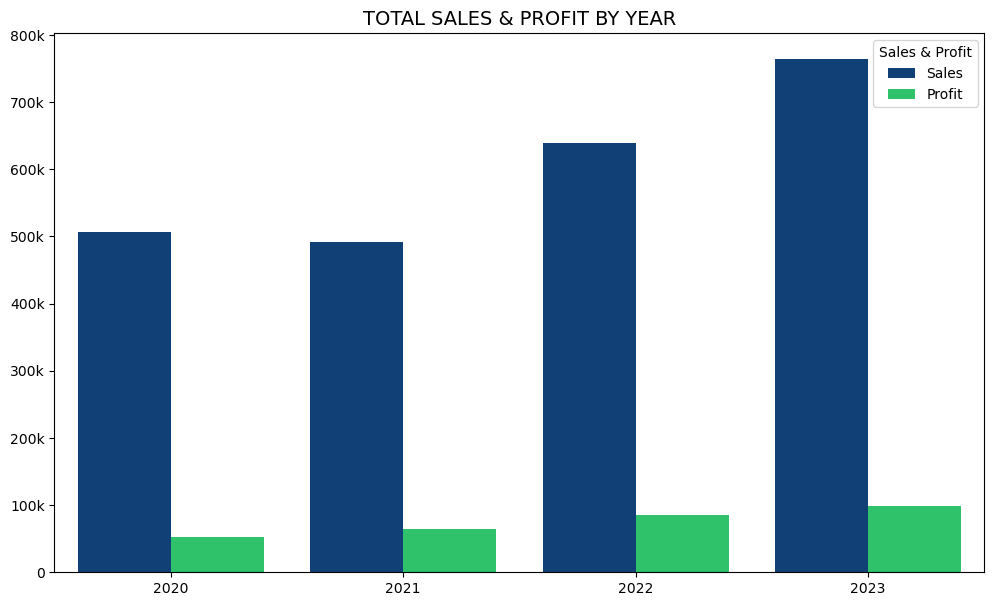

In [6]:
plt.figure(figsize=(12, 7))

sales_profit_year = df3.groupby("Year")[["Sales", "Profit"]].sum().reset_index()
sales_profit_year = pd.melt(sales_profit_year, id_vars=sales_profit_year.columns[:1], value_vars=sales_profit_year.columns[1:], var_name="Sales & Profit", value_name="Value")
sales_profit_year
sns.barplot(data=sales_profit_year, x="Year", y="Value", hue="Sales & Profit", palette=[sales_color, profit_color])
plt.title("TOTAL SALES & PROFIT BY YEAR", fontsize=14)

# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if val >= 1000:
        formatted_labels.append('{:,.0f}k'.format(val / 1000))
    else:
        formatted_labels.append(0)
# Set the formatted labels back on the y-axis
plt.gca().set_yticklabels(formatted_labels)

plt.xlabel(None)
plt.ylabel(None)

[-20000.      0.  20000.  40000.  60000.  80000. 100000. 120000. 140000.]


C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\2649032385.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

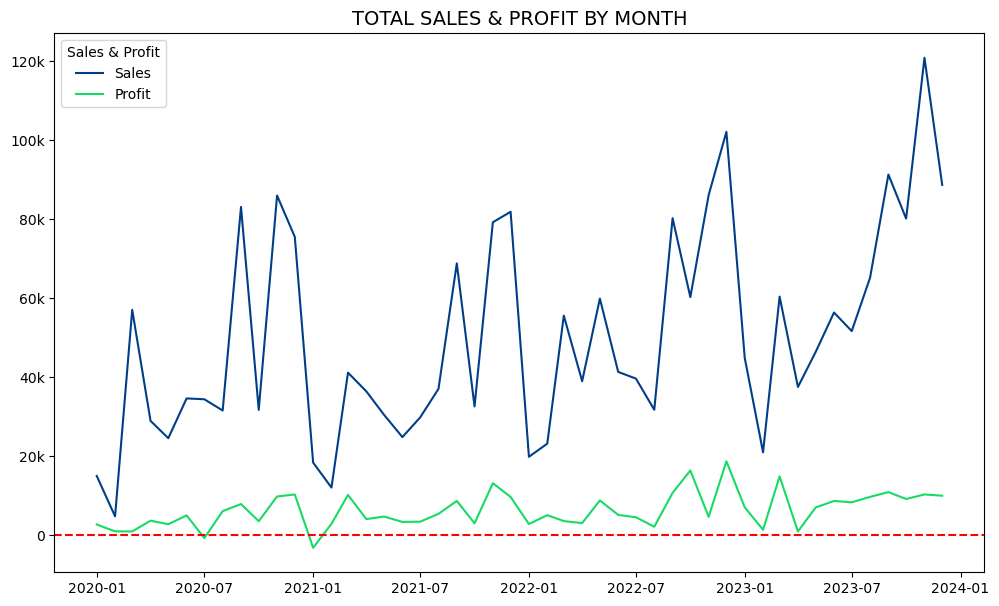

In [7]:
plt.figure(figsize=(12, 7))

sales_profit_monthyear = df3.groupby("monthYear")[["Sales", "Profit"]].sum().reset_index()
sales_profit_monthyear = pd.melt(sales_profit_monthyear, id_vars=sales_profit_monthyear.columns[:1], value_vars=sales_profit_monthyear.columns[1:], var_name="Sales & Profit", value_name="Value")
sales_profit_monthyear["monthYear"] = pd.to_datetime(sales_profit_monthyear["monthYear"].astype(str))

sns.lineplot(data=sales_profit_monthyear, x="monthYear", y="Value", hue="Sales & Profit", palette=[sales_color, profit_color])
plt.axhline(y=0, color="red", linestyle='dashed')
plt.title("TOTAL SALES & PROFIT BY MONTH", fontsize=14)
# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()
print(plt.gca().get_yticks())

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if val >= 1000:
        formatted_labels.append('{:,.0f}k'.format(val / 1000))
    else:
        # formatted_labels.append(str(val))
        formatted_labels.append(0)
# Set the formatted labels back on the y-axis
plt.gca().set_yticklabels(formatted_labels)

plt.xlabel(None)
plt.ylabel(None)



C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\897800534.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

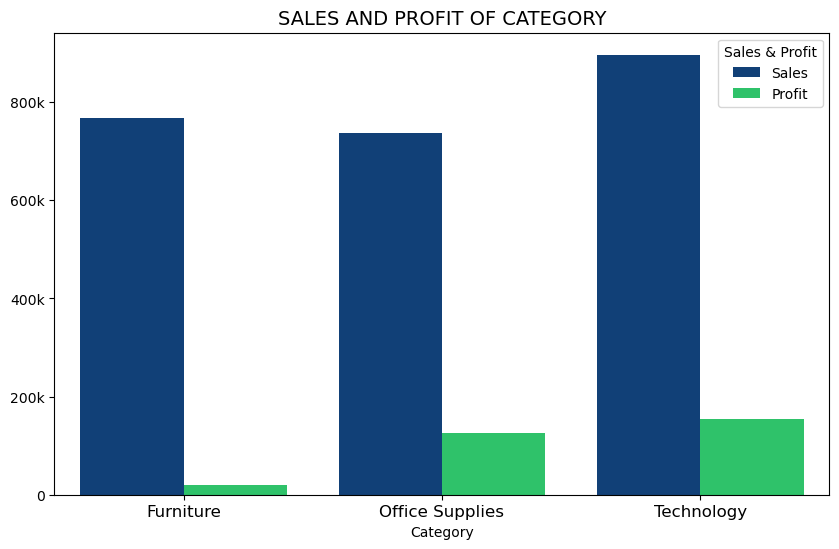

In [8]:
plt.figure(figsize=(10, 6))

newData = df3.groupby("Category")[["Sales", "Profit"]].sum().reset_index()
newData = pd.melt(newData, id_vars=newData.columns[:1], value_vars=newData.columns[1:], var_name="Sales & Profit", value_name="Value")
sns.barplot(data=newData, x="Category", y="Value", hue="Sales & Profit", palette=[sales_color, profit_color])
plt.title('SALES AND PROFIT OF CATEGORY', fontsize=14)
plt.xticks(fontsize=12)

# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if val >= 1000:
        formatted_labels.append('{:,.0f}k'.format(val / 1000))
    else:
        # formatted_labels.append(str(val))
        formatted_labels.append(0)
# Set the formatted labels back on the y-axis
plt.gca().set_yticklabels(formatted_labels)

plt.ylabel(None)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\2809109611.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

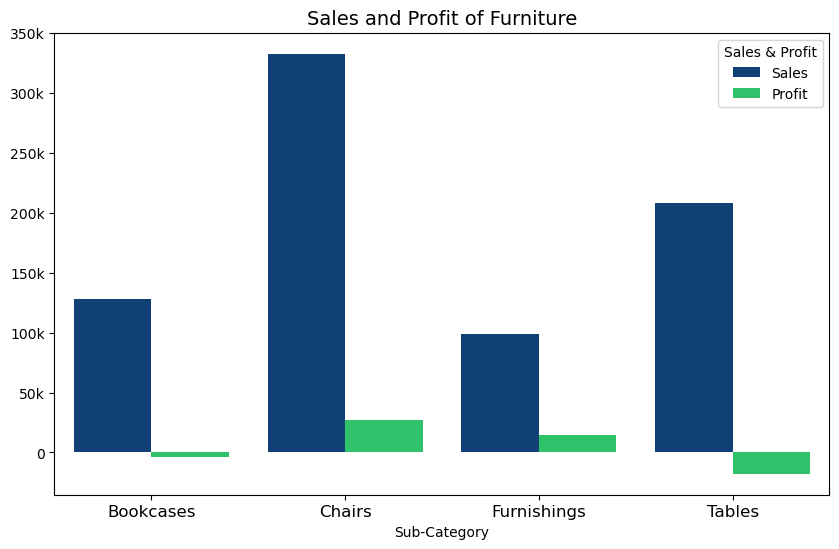

In [9]:
plt.figure(figsize=(10, 6))

newData = df3[df3["Category"] == "Furniture"].groupby("Sub-Category")[["Sales", "Profit"]].sum().reset_index()
newData = pd.melt(newData, id_vars=newData.columns[:1], value_vars=newData.columns[1:], var_name="Sales & Profit", value_name="Value")
sns.barplot(data=newData, x="Sub-Category", y="Value", hue="Sales & Profit", palette=[sales_color, profit_color])
plt.title('Sales and Profit of Furniture', fontsize=14)
plt.xticks(fontsize=12)

# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if val >= 1000:
        formatted_labels.append('{:,.0f}k'.format(val / 1000))
    else:
        # formatted_labels.append(str(val))
        formatted_labels.append(0)
# Set the formatted labels back on the y-axis
plt.gca().set_yticklabels(formatted_labels)

plt.ylabel(None)

In [10]:
tablesAndBookcases = df3[df3["Sub-Category"].isin(["Bookcases", "Tables"])]

# HIGH SALES, LOW PROFIT

C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\2111193067.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pm_data, x="Profit_Rate", y="Sub-Category", palette=cols_list)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\2111193067.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(formatted_labels)


Text(0, 0.5, '')

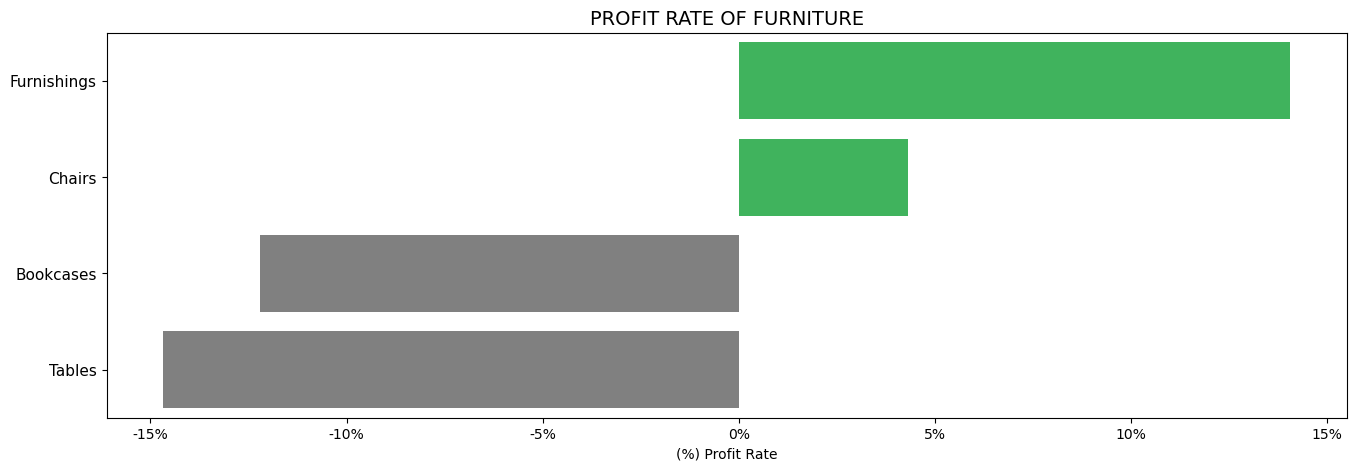

In [11]:
# Calculate Profit Rate
df3["Profit_Rate"] = (df3["Profit"] / df3["Sales"]) * 100
pm_data = df3[df3["Category"] == "Furniture"].groupby("Sub-Category")["Profit_Rate"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16, 5))

focus_sub_fur = ["Bookcases", "Tables"]
cols_list = []
for x in pm_data["Sub-Category"].unique():
    if x in focus_sub_fur:
        cols_list.append("gray")
    else:
        cols_list.append(profit_rate_color)

sns.barplot(data=pm_data, x="Profit_Rate", y="Sub-Category", palette=cols_list)
plt.title("PROFIT RATE OF FURNITURE", fontsize=14)

xticklabels = plt.gca().get_xticks()
formatted_labels = [f"{int(val)}%" for val in xticklabels]

# Set the formatted labels back on the x-axis
plt.gca().set_xticklabels(formatted_labels)


plt.yticks(fontsize=11)
plt.xlabel("(%) Profit Rate")
plt.ylabel(None)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\3970063686.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

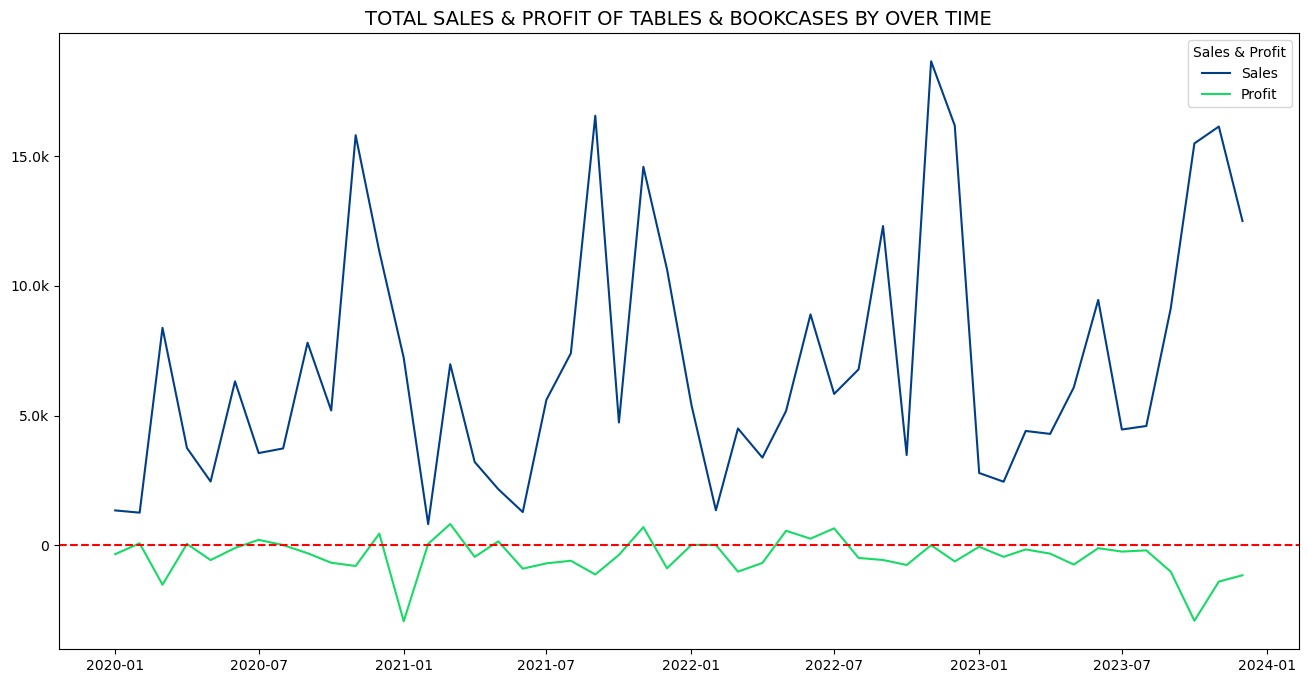

In [12]:
plt.figure(figsize=(16, 8))

sales_profit_tbAndbc = tablesAndBookcases.groupby("monthYear")[["Sales", "Profit"]].sum().reset_index()
sales_profit_tbAndbc = pd.melt(sales_profit_tbAndbc, id_vars=sales_profit_tbAndbc.columns[:1], value_vars=sales_profit_tbAndbc.columns[1:], var_name="Sales & Profit", value_name="Value")
sales_profit_tbAndbc["monthYear"] = pd.to_datetime(sales_profit_tbAndbc["monthYear"].astype(str))

sns.lineplot(data=sales_profit_tbAndbc, x="monthYear", y="Value", hue="Sales & Profit", palette=[sales_color, profit_color])
plt.axhline(y=0, color="red", linestyle='dashed')
plt.title("TOTAL SALES & PROFIT OF TABLES & BOOKCASES BY OVER TIME", fontsize=14)

# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if int(val) == 0:
        formatted_labels.append(0)
    elif val != 1000:
        formatted_labels.append('{:,.1f}k'.format(val / 1000))
# Set the formatted labels back on the y-axis
plt.gca().set_yticklabels(formatted_labels)

plt.xlabel(None)
plt.ylabel(None)


In [13]:
import numpy as np
q3, q1 = np.percentile(tablesAndBookcases["Profit"], [75 ,25])
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

lower_tablesAndBookcases = tablesAndBookcases[tablesAndBookcases["Profit"] < lower]
upper_tablesAndBookcases = tablesAndBookcases[tablesAndBookcases["Profit"] > upper]

Text(0.5, 1.0, 'PROPORTION OF TABLES & BOOKCASES ORDERS BY SEGMENT')

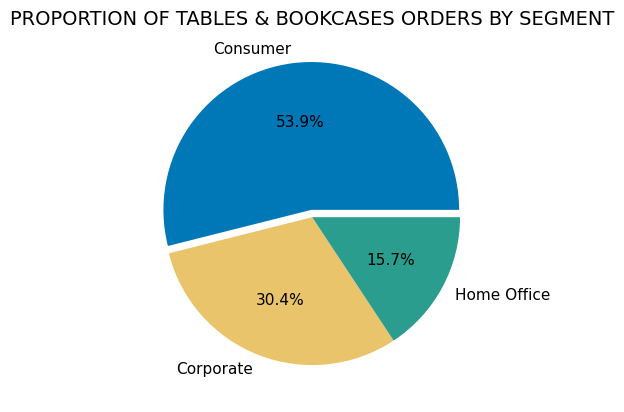

In [14]:
tables_pie = tablesAndBookcases.groupby("Segment")["Order ID"].count()
plt.pie(tables_pie, labels=tables_pie.index, autopct="%1.1f%%", explode=(0.05, 0, 0), textprops={'fontsize': 11}, colors=[consumer_color, corporate_color, office_supplies_color])
plt.title("PROPORTION OF TABLES & BOOKCASES ORDERS BY SEGMENT", fontsize=14)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\3654729969.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

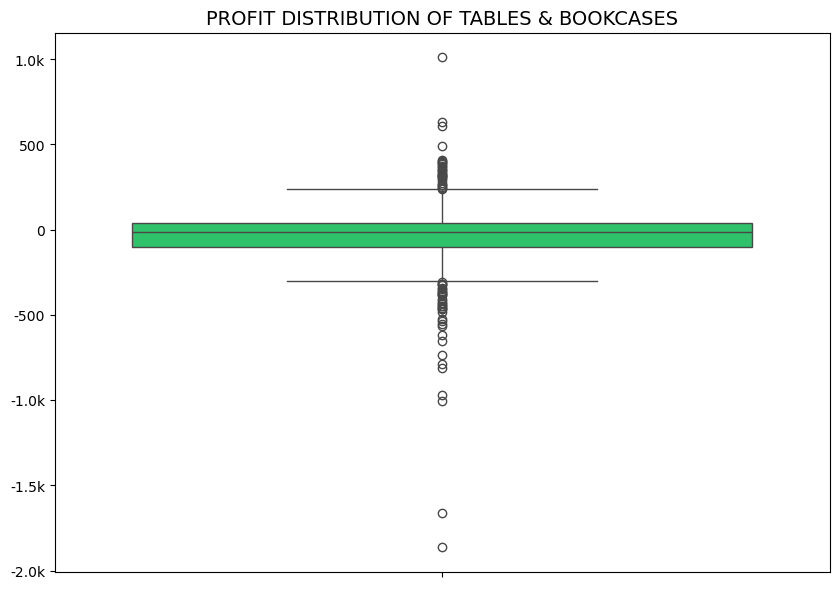

In [15]:

plt.figure(figsize=(10, 7))
sns.boxplot(data=tablesAndBookcases, y="Profit", color=profit_color)
plt.title("PROFIT DISTRIBUTION OF TABLES & BOOKCASES", fontsize=14)

# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if int(val) == 0:
        formatted_labels.append(0)
    elif (val >= 1000) | (val <= -1000):
        formatted_labels.append('{:,.1f}k'.format(val / 1000))
    else: 
        formatted_labels.append(int(val))
# Set the formatted labels back on the y-axis
plt.gca().set_yticklabels(formatted_labels)

plt.ylabel(None)

Text(0.5, 1.0, 'HIGH PROFIT')

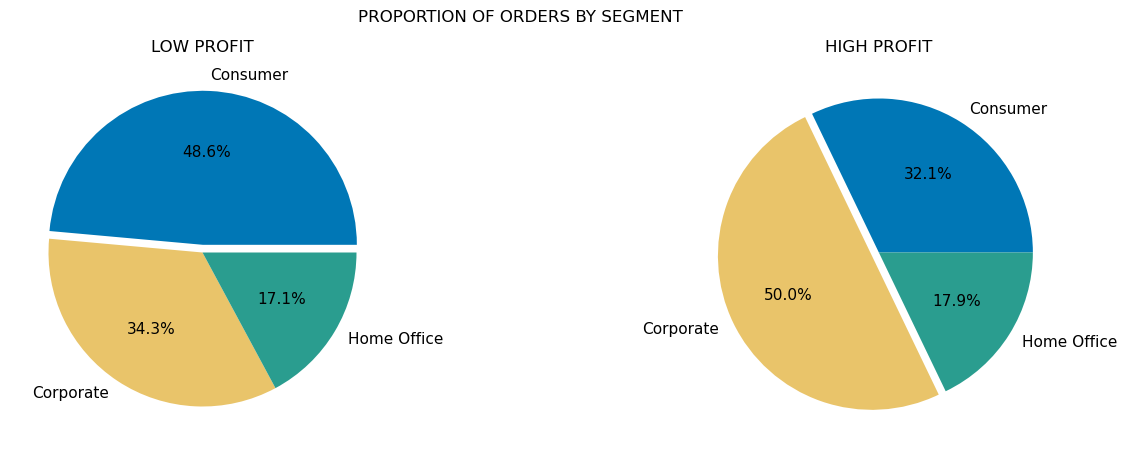

In [16]:
plt.figure(figsize=(16, 5))

upper_pie = upper_tablesAndBookcases.groupby("Segment")["Order ID"].count()
lower_pie = lower_tablesAndBookcases.groupby("Segment")["Order ID"].count()
plt.suptitle("PROPORTION OF ORDERS BY SEGMENT", fontsize=12)

plt.subplot(1, 2, 1)
plt.pie(lower_pie, labels=lower_pie.index, autopct="%1.1f%%", explode=(0.05, 0, 0), textprops={'fontsize': 11}, colors=[consumer_color, corporate_color, office_supplies_color])
plt.title("LOW PROFIT", fontsize=12)

plt.subplot(1, 2, 2)
plt.pie(upper_pie, labels=upper_pie.index, autopct="%1.1f%%", explode=(0, 0.05, 0), textprops={'fontsize': 11}, colors=[consumer_color, corporate_color, office_supplies_color])
plt.title("HIGH PROFIT", fontsize=12)

Text(0, 0.5, '')

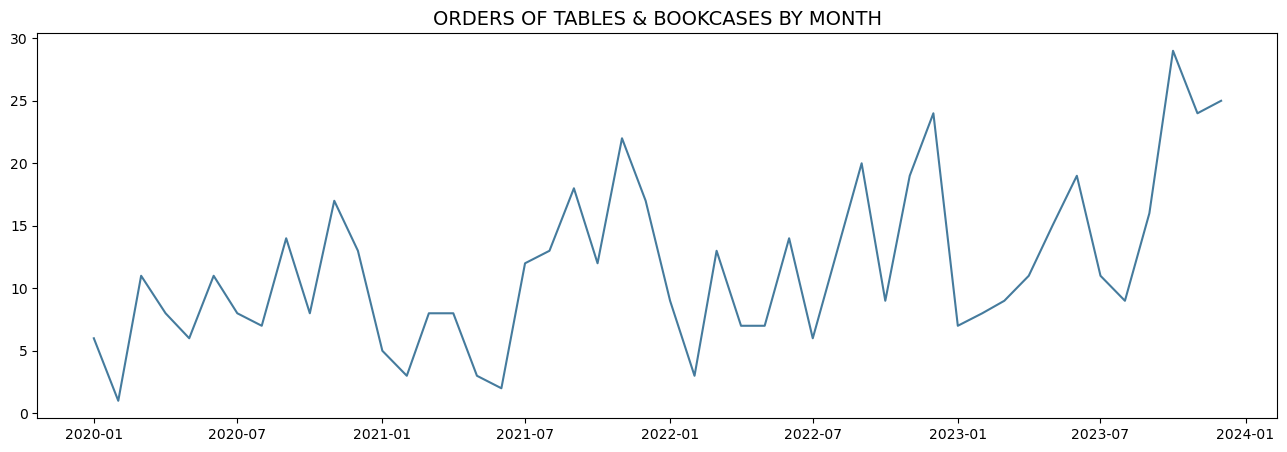

In [17]:
plt.figure(figsize=(16, 5))
tables_data = tablesAndBookcases.groupby("monthYear")["Order ID"].count().reset_index()
tables_data["monthYear"] = pd.to_datetime(tables_data["monthYear"].astype(str))

sns.lineplot(data=tables_data, x="monthYear", y="Order ID", color='#457b9d')
plt.title("ORDERS OF TABLES & BOOKCASES BY MONTH", fontsize=14)

plt.xlabel(None)
plt.ylabel(None)

Text(0, 0.5, '')

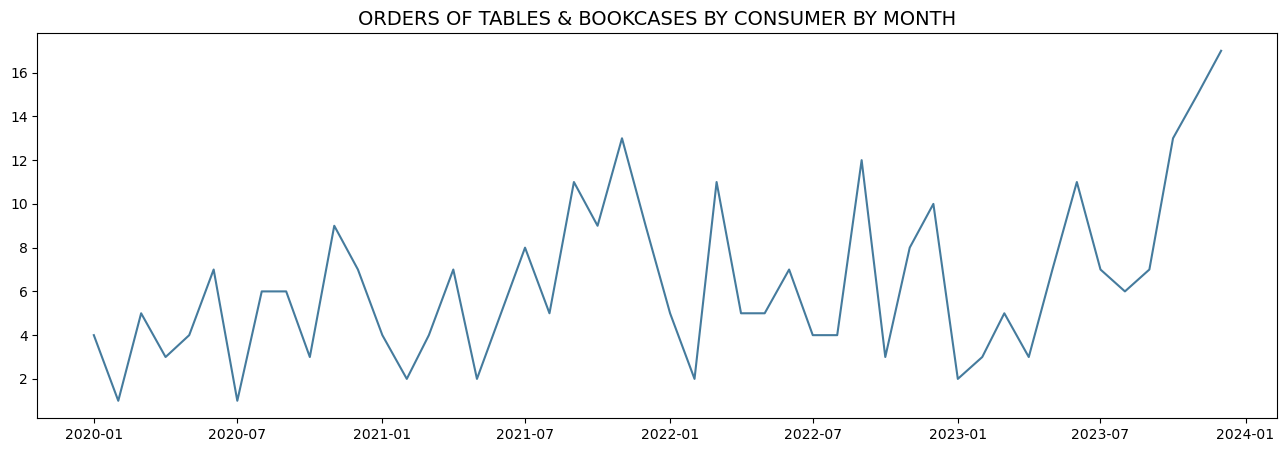

In [18]:
consumer_tables = tablesAndBookcases.groupby(["monthYear", "Segment"])["Order ID"].count().reset_index()
consumer_tables["monthYear"] = pd.to_datetime(consumer_tables["monthYear"].astype(str))

plt.figure(figsize=(16, 5))
sns.lineplot(data=consumer_tables[consumer_tables["Segment"] == "Consumer"], x="monthYear", y="Order ID", color="#457b9d")
plt.title("ORDERS OF TABLES & BOOKCASES BY CONSUMER BY MONTH", fontsize=14)

plt.xlabel(None)
plt.ylabel(None)

# LOW SALES, HIGH PROFIT

C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\2602138130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pm_OSupplies_data, x="Profit_Rate", y="Sub-Category", palette=cols_list)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\2602138130.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(formatted_labels)


Text(0, 0.5, '')

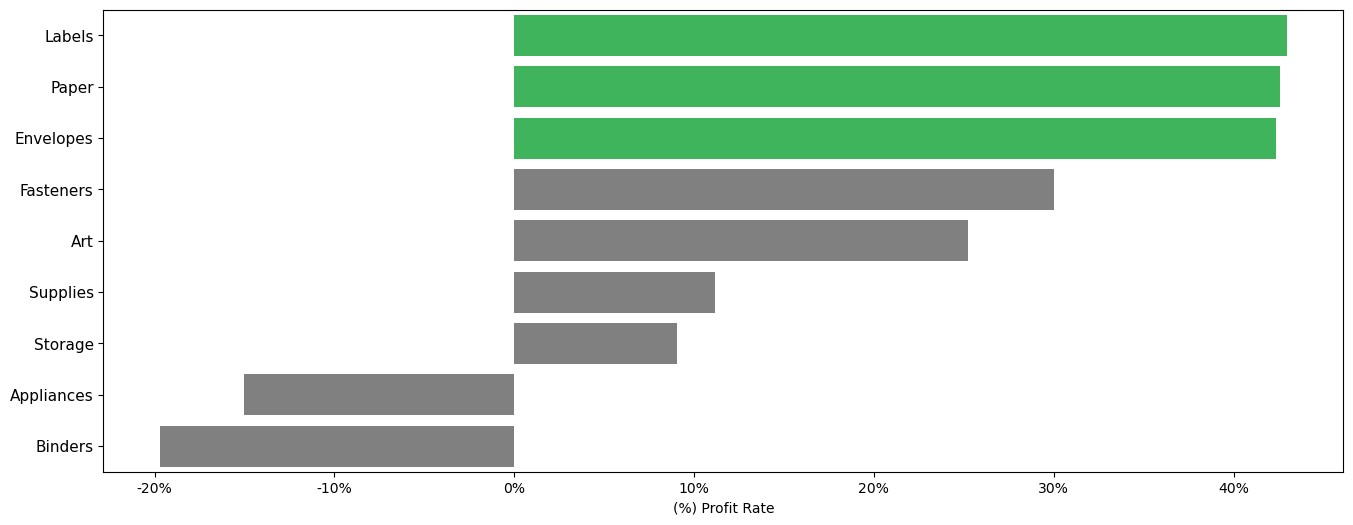

In [19]:
pm_OSupplies_data = df3[df3["Category"] == "Office Supplies"].groupby("Sub-Category")["Profit_Rate"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16, 6))

focus_sub_fur = ["Envelopes", "Labels", "Paper"]
cols_list = []
for x in pm_OSupplies_data["Sub-Category"].unique():
    if x in focus_sub_fur:
        cols_list.append(profit_rate_color)
    else:
        cols_list.append("gray")


sns.barplot(data=pm_OSupplies_data, x="Profit_Rate", y="Sub-Category", palette=cols_list)
# plt.title("PROFIT RATE OF OFFICE SUPPLIES", fontsize=14)

plt.yticks(fontsize=11)

xticklabels = plt.gca().get_xticks()
formatted_labels = [f"{int(val)}%" for val in xticklabels]

# Set the formatted labels back on the x-axis
plt.gca().set_xticklabels(formatted_labels)


plt.xlabel("(%) Profit Rate")
plt.ylabel(None)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\3784049472.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

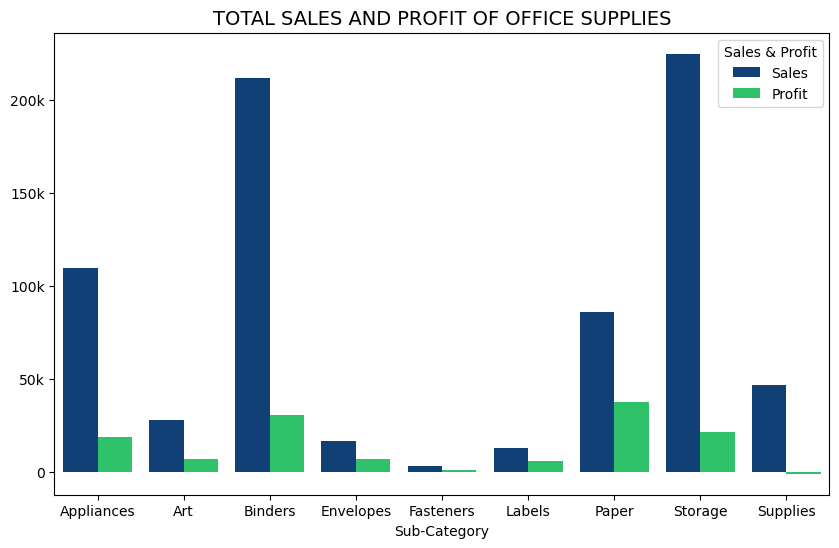

In [20]:
plt.figure(figsize=(10, 6))
sales_profit_supplies = df3[df3["Category"] == "Office Supplies"].groupby("Sub-Category")[["Sales", "Profit"]].sum().reset_index()
sales_profit_supplies = pd.melt(sales_profit_supplies, id_vars=sales_profit_supplies.columns[:1], value_vars=sales_profit_supplies.columns[1:], var_name="Sales & Profit", value_name="Value")
sns.barplot(data=sales_profit_supplies, x="Sub-Category", y="Value", hue="Sales & Profit", palette=[sales_color, profit_color])
plt.title('TOTAL SALES AND PROFIT OF OFFICE SUPPLIES', fontsize=14)

# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if int(val) == 0:
        formatted_labels.append(0)
    elif val != 1000:
        formatted_labels.append('{:,.0f}k'.format(val / 1000))
# Set the formatted labels back on the y-axis
plt.gca().set_yticklabels(formatted_labels)

plt.ylabel(None)

In [5]:
def filterHandler(x):
    if "Envelopes" in x: 
        return 1
    else: 
        return 0

envelope_list = df3.groupby("Order ID")["Sub-Category"].unique().reset_index()
print(envelope_list)
envelope_list["check"] = envelope_list["Sub-Category"].apply(filterHandler)
envelope_list = envelope_list[envelope_list["check"] == 1]


            Order ID                                      Sub-Category
0     CA-2020-100006                                          [Phones]
1     CA-2020-100090                                 [Tables, Binders]
2     CA-2020-100293                                           [Paper]
3     CA-2020-100328                                         [Binders]
4     CA-2020-100363                                [Fasteners, Paper]
...              ...                                               ...
5004  US-2023-168802                                         [Binders]
5005  US-2023-169320                                [Art, Accessories]
5006  US-2023-169488                                           [Paper]
5007  US-2023-169502                            [Supplies, Appliances]
5008  US-2023-169551  [Bookcases, Paper, Phones, Storage, Accessories]

[5009 rows x 2 columns]


In [22]:
def filterHandler(x):
    if "Labels" in x: 
        return 1
    else: 
        return 0

label_list = df3.groupby("Order ID")["Sub-Category"].unique().reset_index()
label_list["check"] = label_list["Sub-Category"].apply(filterHandler)
label_list = label_list[label_list["check"] == 1]


In [23]:
dictEnvelope = {}
def loopHanlder(x): 
    for i in x:
        if i != "Envelopes":
            if i not in dictEnvelope:
                dictEnvelope[i] = 1
            else:
                dictEnvelope[i] += 1
    return dictEnvelope
envelope_list["Sub-Category"].apply(loopHanlder)
dictEnvelope


{'Art': 27,
 'Chairs': 29,
 'Accessories': 32,
 'Phones': 41,
 'Binders': 54,
 'Paper': 57,
 'Fasteners': 11,
 'Supplies': 5,
 'Storage': 38,
 'Copiers': 4,
 'Appliances': 21,
 'Furnishings': 32,
 'Machines': 6,
 'Bookcases': 11,
 'Tables': 12,
 'Labels': 11}

In [24]:
dictLabels = {}
def loopHanlder(x): 
    for i in x:
        if i != "Labels":
            if i not in dictLabels:
                dictLabels[i] = 1
            else:
                dictLabels[i] += 1
    return dictLabels
label_list["Sub-Category"].apply(loopHanlder)
dictLabels


{'Art': 47,
 'Paper': 80,
 'Phones': 58,
 'Fasteners': 15,
 'Binders': 82,
 'Storage': 61,
 'Furnishings': 57,
 'Accessories': 47,
 'Supplies': 18,
 'Bookcases': 21,
 'Machines': 8,
 'Chairs': 36,
 'Appliances': 21,
 'Tables': 17,
 'Envelopes': 11,
 'Copiers': 6}

In [25]:
envelopesData = pd.DataFrame(dictEnvelope.items(), columns = ["SubCategory", "Count"]).sort_values(by="Count", ascending=False)
labelsData = pd.DataFrame(dictLabels.items(), columns = ["SubCategory", "Count"]).sort_values(by="Count", ascending=False)

In [26]:
df_merged = pd.merge(envelopesData, labelsData, how='outer')
df_merged = df_merged.groupby("SubCategory")["Count"].sum().reset_index().sort_values(by="Count", ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14892\4214671433.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merged, x="SubCategory", y="Count", palette=cols_list)


Text(0, 0.5, '')

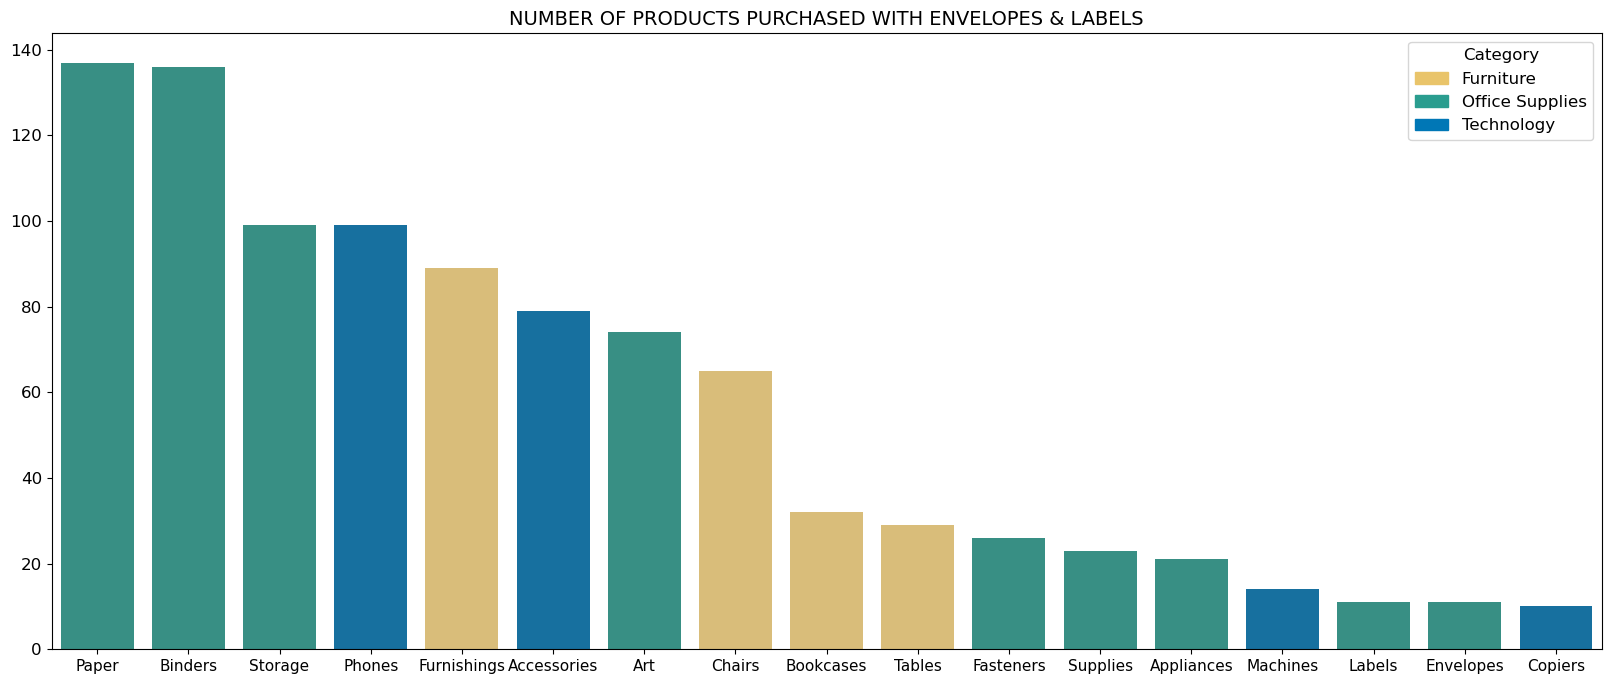

In [27]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20, 8))

sub_fur_list = df3[df3["Category"] == "Furniture"]["Sub-Category"].unique()
sub_os_list = df3[df3["Category"] == "Office Supplies"]["Sub-Category"].unique()
sub_tech_list = df3[df3["Category"] == "Technology"]["Sub-Category"].unique()
cols_list = []
for x in df_merged["SubCategory"]:
    if x in sub_fur_list:
        cols_list.append(corporate_color)
    elif x in sub_os_list:
        cols_list.append(office_supplies_color)
    else:
        cols_list.append(consumer_color)

fur_patch = mpatches.Patch(color=corporate_color, label='Furniture')
os_patch = mpatches.Patch(color=office_supplies_color, label='Office Supplies')
tech_patch = mpatches.Patch(color=consumer_color, label='Technology')
plt.legend(handles=[fur_patch, os_patch, tech_patch], title="Category", title_fontsize=12, fontsize=12)

sns.barplot(data=df_merged, x="SubCategory", y="Count", palette=cols_list)
plt.title("NUMBER OF PRODUCTS PURCHASED WITH ENVELOPES & LABELS", fontsize=14)

plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.xlabel(None)
plt.ylabel(None)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Profit'),
  Text(0, 1.5, 'Sales'),
  Text(0, 2.5, 'Discount'),
  Text(0, 3.5, 'Discounted_Order'),
  Text(0, 4.5, 'Total_Order')])

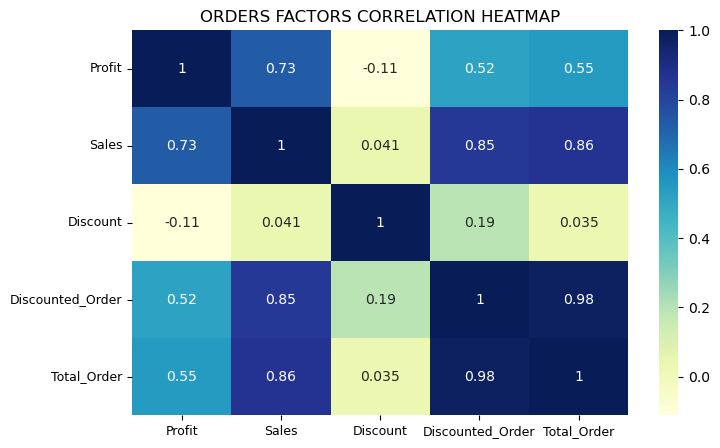

In [28]:
envelopesAndLabels = df3[(df3["Category"] == "Office Supplies")]
corrEnvelopesAndLables = envelopesAndLabels.groupby("monthYear")[["Profit", "Sales", "Discount"]].agg({"Profit": "sum", "Sales": "sum", "Discount": "mean"})  

corrEnvelopesAndLables["Discounted_Order"] = envelopesAndLabels[envelopesAndLabels["Discount"] > 0].groupby("monthYear")["Order ID"].count()
corrEnvelopesAndLables["Total_Order"] = envelopesAndLabels.groupby("monthYear")["Order ID"].count()

plt.figure(figsize=(8, 5))
sns.heatmap(corrEnvelopesAndLables.corr(), cmap="YlGnBu", annot=True) 
plt.title("ORDERS FACTORS CORRELATION HEATMAP")

plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)

# NEW AND EXISTING CUSTOMERS


In [29]:
# Ngày khách hàng mua gần nhất
min_purchase = df3.groupby("Customer ID")["Order Date"].min().reset_index()
min_purchase["Order Date"] = min_purchase["Order Date"].dt.to_period("M")
min_purchase.columns = ["Customer ID", "MinPurchaseYearMonth"]


In [30]:
df3 = pd.merge(df3, min_purchase, on="Customer ID", how="inner")

In [31]:
df3["UserType"] = "New" 
df3.loc[df3["monthYear"] > df3["MinPurchaseYearMonth"], "UserType"] = "Existing"
df3["UserType"].value_counts()

UserType
Existing    8622
New         1750
Name: count, dtype: int64

In [32]:
new_customer_by_time = df3[df3["UserType"] == "New"].groupby("monthYear")["Customer ID"].nunique()
existing_customer_by_time = df3[df3["UserType"] == "Existing"].groupby("monthYear")["Customer ID"].nunique()

# 1

C:\Users\Admin\AppData\Local\Temp\ipykernel_6316\648483159.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

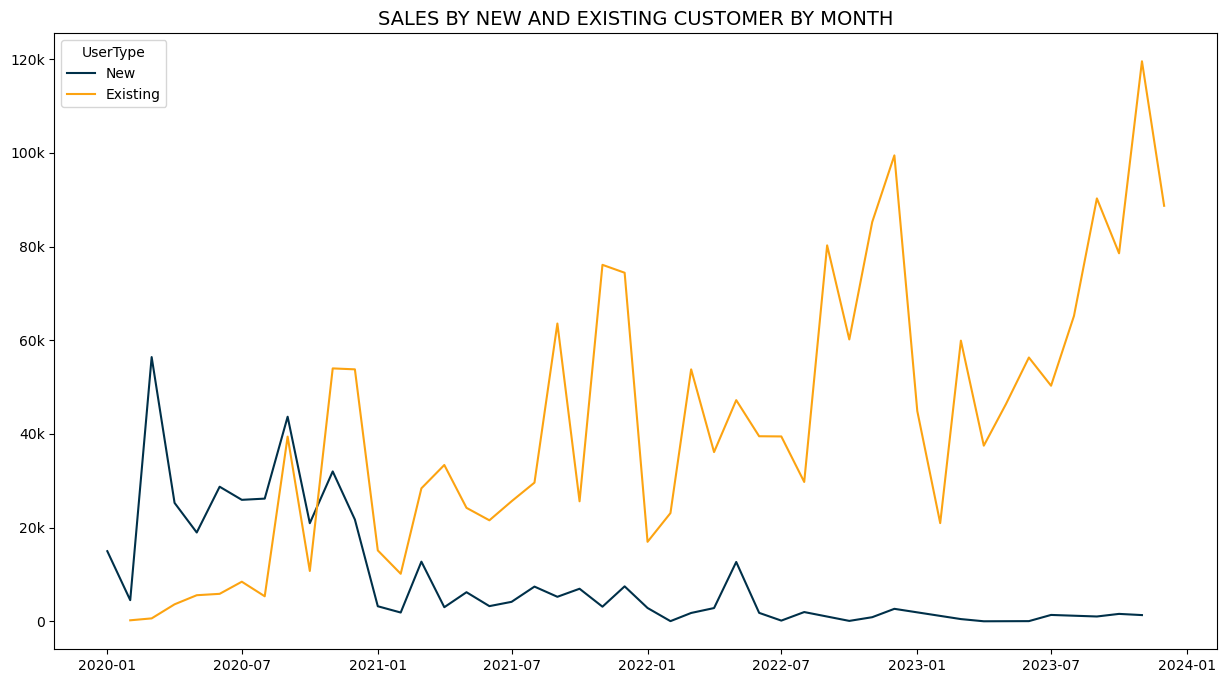

In [88]:
user_type_revenue = df3.groupby(["monthYear", "UserType"])["Sales"].sum().reset_index()
user_type_revenue["monthYear"] = pd.to_datetime(user_type_revenue["monthYear"].astype(str))

plt.figure(figsize=(15, 8))
sns.lineplot(data=user_type_revenue, x="monthYear", y="Sales", hue="UserType", palette=[newCustomer_color, existingCustomer_color])
plt.title("SALES BY NEW AND EXISTING CUSTOMER BY MONTH", fontsize=14)


# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if int(val) == 0:
        formatted_labels.append(0)
    elif val != 1000:
        formatted_labels.append('{:,.0f}k'.format(val / 1000))
# Set the formatted labels back on the y-axis
plt.gca().set_yticklabels(formatted_labels)

plt.xlabel(None)
plt.ylabel(None)

In [120]:
test = pd.merge(new_customer_by_time, existing_customer_by_time, on="monthYear", how='left')
test.columns = ['monthYear', 'newCustomer', 'oldCustomer']
test['oldCustomer'] = test['oldCustomer'].fillna(0).astype(int)
test.head(10)

,monthYear,newCustomer,oldCustomer
0,2020-01-01,32,0
1,2020-02-01,24,3
2,2020-03-01,65,4
3,2020-04-01,56,8
4,2020-05-01,56,11
5,2020-06-01,48,15
6,2020-07-01,44,21
7,2020-08-01,49,21
8,2020-09-01,68,50
9,2020-10-01,42,33


In [121]:
test = pd.melt(test, id_vars=test.columns[:1], value_vars=test.columns[1:], var_name="Customer", value_name="Amount")
test


,monthYear,Customer,Amount
0,2020-01-01,newCustomer,32
1,2020-02-01,newCustomer,24
2,2020-03-01,newCustomer,65
3,2020-04-01,newCustomer,56
4,2020-05-01,newCustomer,56
...,...,...,...
79,2023-06-01,oldCustomer,117
80,2023-07-01,oldCustomer,100
81,2023-09-01,oldCustomer,195
82,2023-10-01,oldCustomer,134


In [122]:
totalCustomer = df3[["monthYear", "UserType"]].groupby("monthYear").count().reset_index()
totalCustomer['monthYear'] = pd.to_datetime(totalCustomer['monthYear'].astype(str))
test = pd.merge(test, totalCustomer, on="monthYear", how="inner")
test["Percentage"] = test["Amount"] / test["UserType"] * 100
test.drop(columns=["Amount", "UserType"], inplace=True)
test

,monthYear,Customer,Percentage
0,2020-01-01,newCustomer,39.024390
1,2020-02-01,newCustomer,48.000000
2,2020-03-01,newCustomer,40.372671
3,2020-04-01,newCustomer,40.000000
4,2020-05-01,newCustomer,44.094488
...,...,...,...
79,2023-06-01,oldCustomer,45.348837
80,2023-07-01,oldCustomer,41.841004
81,2023-09-01,oldCustomer,41.139241
82,2023-10-01,oldCustomer,43.790850


Text(0.5, 1.0, 'NEW AND OLD CUSTOMER PERCENTAGE BY MONTH')

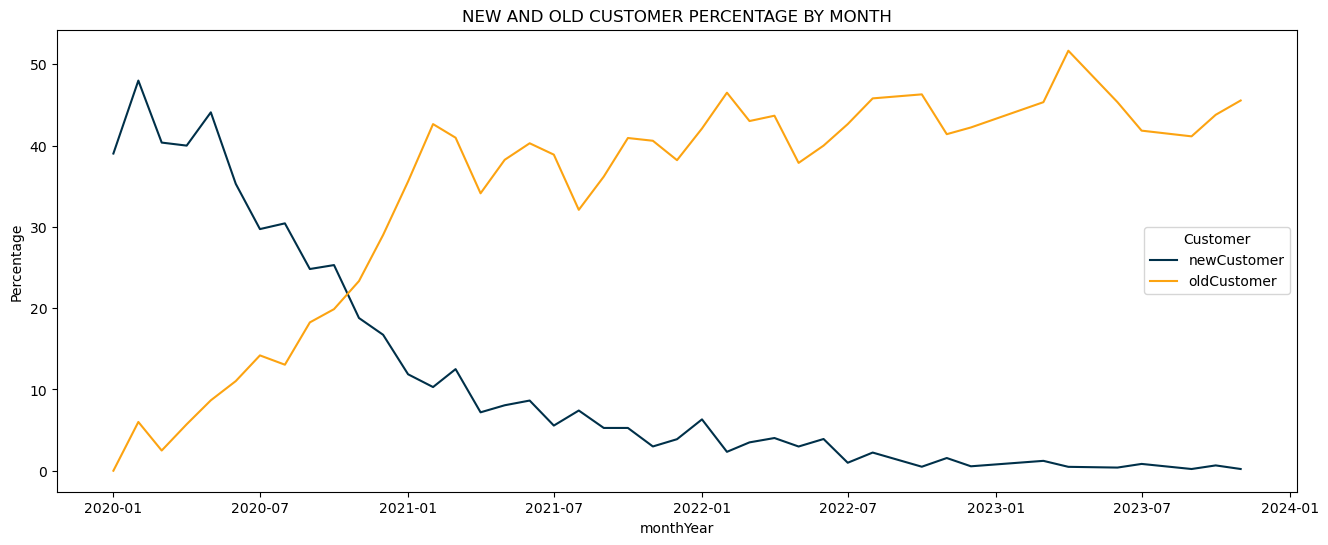

In [125]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=test, x="monthYear", y="Percentage", hue="Customer", palette=[newCustomer_color, existingCustomer_color])
plt.title("NEW AND OLD CUSTOMER PERCENTAGE BY MONTH")

# 2

Text(0, 0.5, '')

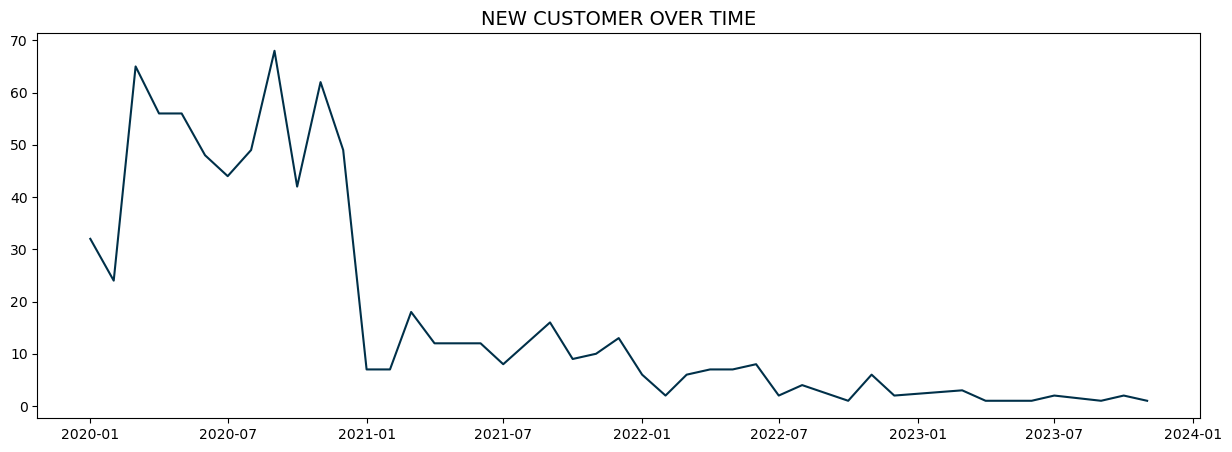

In [34]:
plt.figure(figsize=(15, 5))
new_customer_by_time = new_customer_by_time.reset_index()
new_customer_by_time["monthYear"] = pd.to_datetime(new_customer_by_time["monthYear"].astype("string"))
sns.lineplot(data=new_customer_by_time, x="monthYear", y="Customer ID", color=newCustomer_color)
plt.title("NEW CUSTOMER OVER TIME", fontsize=14)

plt.xlabel(None)
plt.ylabel(None)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6316\141434010.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

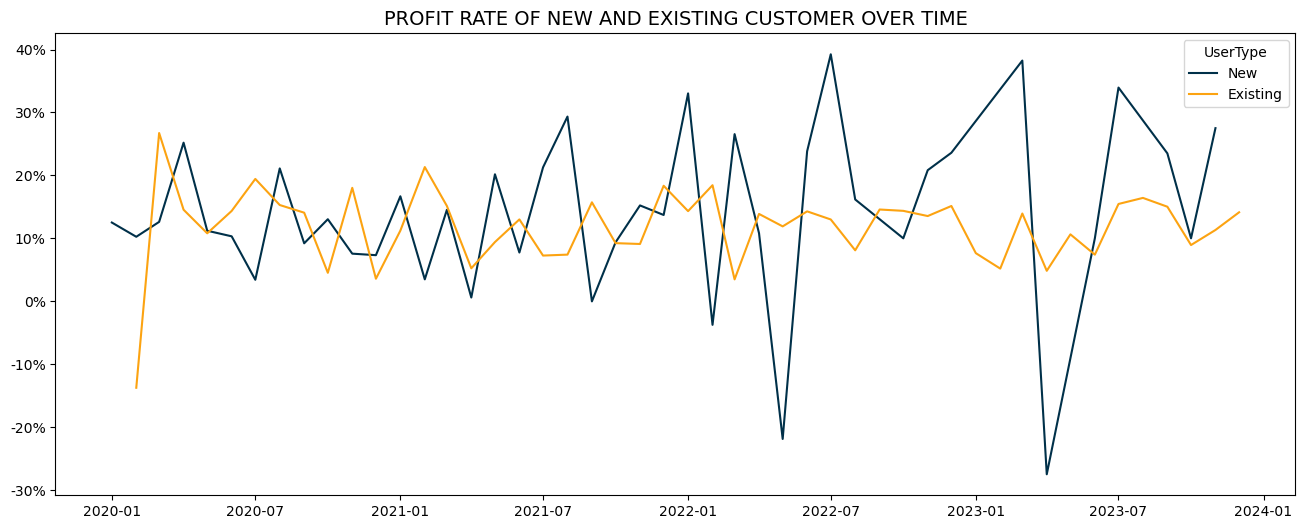

In [35]:
profitRateCustomer = df3[["Profit_Rate", "monthYear", "UserType"]].groupby(["monthYear", "UserType"])["Profit_Rate"].mean().reset_index()
profitRateCustomer["monthYear"] = pd.to_datetime(profitRateCustomer["monthYear"].astype(str))
plt.figure(figsize=(16, 6))
sns.lineplot(data=profitRateCustomer, x="monthYear", y="Profit_Rate", hue="UserType", palette=[newCustomer_color, existingCustomer_color])
plt.title("PROFIT RATE OF NEW AND EXISTING CUSTOMER OVER TIME", fontsize=14)

yticklabels = plt.gca().get_yticks()
formatted_labels = [f"{int(val)}%" for val in yticklabels]

# Set the formatted labels back on the x-axis
plt.gca().set_yticklabels(formatted_labels)

plt.xlabel(None)
plt.ylabel(None)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6316\3243179388.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


Text(0, 0.5, '')

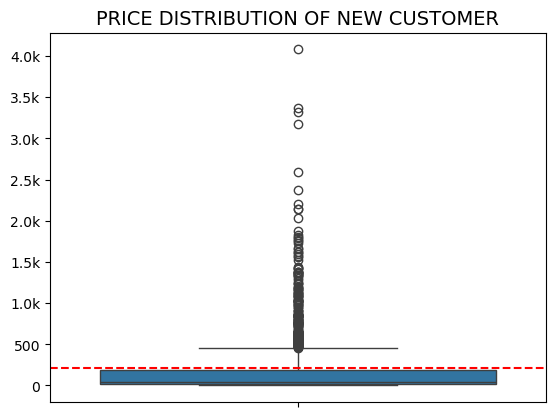

In [76]:
newCustomer = df3[df3["UserType"] == "New"][["Order ID", "Sub-Category", "Quantity", "Discount", "Segment", "Sales", "Profit"]]
newCustomer["Price"] = newCustomer["Sales"] - newCustomer["Profit"]
sns.boxplot(data=newCustomer[newCustomer["Price"] < 5000], y="Price")
plt.axhline(y=newCustomer["Price"].mean(), color="red", linestyle='dashed')
plt.title("PRICE DISTRIBUTION OF NEW CUSTOMER", fontsize=14)
plt.ylabel(None)

# Get the current y-axis labels
yticklabels = plt.gca().get_yticks()

# Format the labels using f-strings for concise string formatting
formatted_labels = []
for val in yticklabels:
    if int(val) == 0:
        formatted_labels.append(0)
    elif val >= 1000:
        formatted_labels.append('{:,.1f}k'.format(val / 1000))
    else: 
        formatted_labels.append(int(val))
# Set the formatted labels back on the y-axis

plt.gca().set_yticklabels(formatted_labels)

plt.ylabel(None)

In [37]:
newCustomer = newCustomer.groupby("Order ID").agg({"Sub-Category": "unique", "Quantity": "sum", "Discount": "mean"})
newCustomer = newCustomer.sort_values(by="Quantity", ascending=False)
newCustomer

,Sub-Category,Quantity,Discount
Order ID,,,
CA-2020-106439,"[Fasteners, Storage, Binders, Paper, Chairs, A...",58,0.060000
CA-2020-129364,"[Labels, Binders, Phones, Supplies, Accessorie...",39,0.262500
CA-2020-115812,"[Furnishings, Art, Phones, Binders, Appliances...",38,0.114286
CA-2020-139892,"[Art, Machines, Storage, Chairs, Appliances, P...",37,0.328571
CA-2020-131450,"[Appliances, Copiers, Phones, Furnishings]",36,0.100000
...,...,...,...
CA-2020-154186,[Supplies],1,0.200000
CA-2020-150301,[Chairs],1,0.100000
CA-2021-104059,[Art],1,0.200000


In [38]:
dictProduct = {}
def loopHanlder(x): 
    for i in x:
        if i not in dictProduct:
            dictProduct[i] = 1
        else:
            dictProduct[i] += 1
    return dictProduct
newCustomer["Sub-Category"].apply(loopHanlder)
dictProduct


{'Fasteners': 36,
 'Storage': 133,
 'Binders': 225,
 'Paper': 198,
 'Chairs': 95,
 'Accessories': 120,
 'Art': 139,
 'Labels': 63,
 'Phones': 127,
 'Supplies': 34,
 'Furnishings': 134,
 'Appliances': 72,
 'Tables': 58,
 'Machines': 15,
 'Copiers': 10,
 'Envelopes': 40,
 'Bookcases': 34}

C:\Users\Admin\AppData\Local\Temp\ipykernel_6316\154543088.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=productData, x="SubCategory", y="Count", palette=cols_list)


Text(0, 0.5, '')

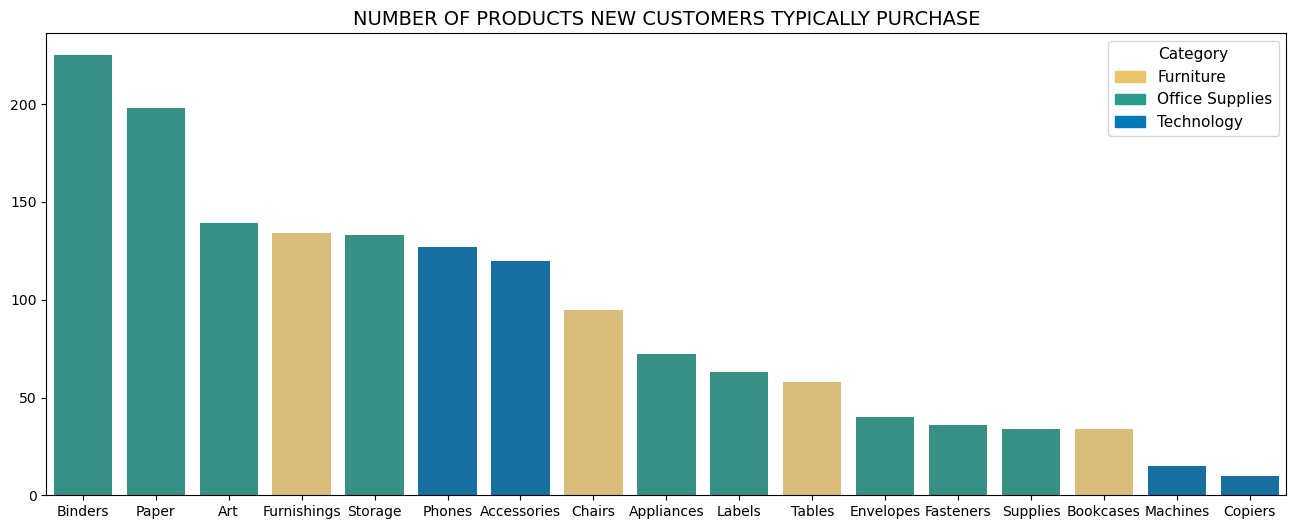

In [40]:
productData = pd.DataFrame(dictProduct.items(), columns = ["SubCategory", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(16, 6))

sub_fur_list = df3[df3["Category"] == "Furniture"]["Sub-Category"].unique()
sub_os_list = df3[df3["Category"] == "Office Supplies"]["Sub-Category"].unique()
sub_tech_list = df3[df3["Category"] == "Technology"]["Sub-Category"].unique()
cols_list = []
for x in productData["SubCategory"]:
    if x in sub_fur_list:
        cols_list.append(corporate_color)
    elif x in sub_os_list:
        cols_list.append(office_supplies_color)
    else:
        cols_list.append(consumer_color)

fur_patch = mpatches.Patch(color=corporate_color, label='Furniture')
os_patch = mpatches.Patch(color=office_supplies_color, label='Office Supplies')
tech_patch = mpatches.Patch(color=consumer_color, label='Technology')
plt.legend(handles=[fur_patch, os_patch, tech_patch], title="Category", title_fontsize=11, fontsize=11)

sns.barplot(data=productData, x="SubCategory", y="Count", palette=cols_list)
plt.title("NUMBER OF PRODUCTS NEW CUSTOMERS TYPICALLY PURCHASE", fontsize=14)

plt.xlabel(None)
plt.ylabel(None)